# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19136856,
            "id": 1,
            "last_updated": 1661888310,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 382711404517,
                    "percent_change_1h": 1.24288798499437,
                    "percent_change_24h": -0.688286951291217,
                    "percent_change_7d": -6.49084612944077,
                    "percentage_change_1h": 1.24288798499437,
                    "percentage_change_24h": -0.688286951291217,
                    "percentage_change_7d": -6.49084612944077,
                    "price": 19999.5,
                    "volume_24h": 29809684385
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19136856,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120314711,
            "id": 1027,
            "last_updated": 1661888335,
            "max_supply": 120314711,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 187000788344,
                    "percent_change_1h": 3.42535230695119,
                    "percent_change_24h": 1.23264448133961,
                    "percent_change_7d": -4.37218653313028,
                    "percentage_change_1h": 3.42535230695119,
                    "percentage_change_24h": 1.23264448133961,
                    "percentage_change_7d": -4.37218653313028,
                    "price": 1551.38,
                    "volume_24h": 19225402396
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120314711,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypto

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
                                            

# Print the current price of BTC
print(btc_price)

19999.5


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(eth_price)

1551.38


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(btc_value)

23999.399999999998


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(eth_value)

8222.314


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"${total_crypto_wallet: .2f}")

$ 32221.71


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object

alpaca= tradeapi.REST(
    alpaca_api_key, alpaca_secret_key, api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-08-29", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-29", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_closing_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_closing_prices

# Reorganize the DataFrame
SPY = df_closing_prices[df_closing_prices["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_closing_prices[df_closing_prices["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_closing_prices = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
df_closing_prices.head()

SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2022-08-29 04:00:00+00:00  402.23  405.84  401.1999  402.63  65225959   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-08-29 04:00:00+00:00      489086  403.552893  101.27  101.28  101.055   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-29 04:00:00+00:00  101.12  7508760       15383  101.176898

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_closing_prices["AGG"]["close"])

# Print the AGG closing price
print(f"Curent AGG closing price: ${agg_close_price}")

Curent AGG closing price: $101.12


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_closing_prices["SPY"]["close"])

# Print the SPY closing price
print(f"Current SPY closing price: ${spy_close_price}")


Current SPY closing price: $402.63


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(agg_value)

20224.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(spy_value)


44289.3


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)


64513.3


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(total_portfolio)


96735.014


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [44]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[32221.714, 64513.3]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [45]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["cryto", "stock/bond"])

# Display the savings_df DataFrame
#transpose the table so Crypto and Stock/Bond are on the headers
savings_df.T


,cryto,stock/bond
amount,32221.714,64513.3


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total Portfolio Assets- Pie Chart'}, ylabel='amount'>

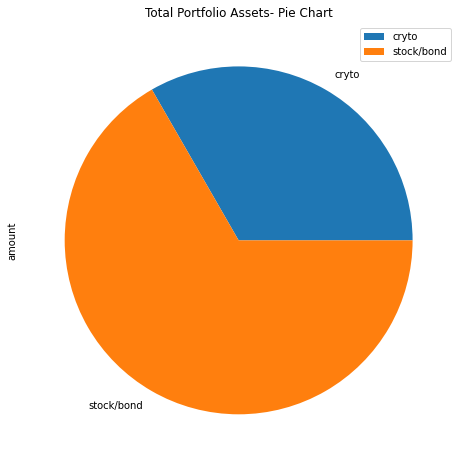

In [46]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount",
                    figsize=(10,8),
                    title="Total Portfolio Assets- Pie Chart")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [47]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3*monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [113]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Dear client: Good news! At this time the value of your portfolio has enough money should you experience an emergency.")
elif total_portfolio == emergency_fund_value:
    print(f"Dear client: Our analysis finds that you are approaching your goal of having sufficient money in case of an emergency.")
    print("Your emergency fund should be 3 times your current monthly income.")
else:
    print(f"Dear client: At this time the value of your total portfolio is ${emergency_fund_value}, which is ${emergency_fund_value - total_portfolio}, from the amount needed in case there is an emergency.")

Dear client: Good news! At this time the value of your portfolio has enough money should you experience an emergency.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [53]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-08-29", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-29", tz="America/New_York").isoformat()


In [55]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
pricing_df_stocks = alpaca.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = pricing_df_stocks[pricing_df_stocks["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = pricing_df_stocks[pricing_df_stocks["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
pricing_df_stocks = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])


# Display both the first and last five rows of the DataFrame
display(pricing_df_stocks.head())
display(pricing_df_stocks.tail())


SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2019-08-29 04:00:00+00:00  291.77  293.1600  290.610  292.58  58018751   
2019-08-30 04:00:00+00:00  294.21  294.2399  291.420  292.45  63024780   
2019-09-03 04:00:00+00:00  290.56  291.5800  289.270  290.74  69233875   
2019-09-04 04:00:00+00:00  293.15  294.0550  292.310  294.04  47160461   
2019-09-05 04:00:00+00:00  296.78  298.8300  294.001  297.82  83356779   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2019-08-29 04:00:00+00:00      309986  292.211021  291.77  293.1600  290.610   
2019-08-30 04:00:00+00:00      303476  292.713824  294.21  294.2399  291.420   
2019-09-03 04:00:00+00:00      362212  290.492676  290.56  291.5800  289.270   
2019-09-04 04:00:00+00:00      236850  293.322384  293.15  294.0550  292.310   
2019-09-05 04:00:00+00:00      377089  297.528062  296.78  298.8300  294.001   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-08-29 04:00:00+00:00  292.58  58018751      309986  292.211021  
2019-08-30 04:00:00+00:00  292.45  63024780      303476  292.713824  
2019-09-03 04:00:00+00:00  290.74  69233875      362212  290.492676  
2019-09-04 04:00:00+00:00  294.04  47160461      236850  293.322384  
2019-09-05 04:00:00+00:00  297.82  83356779      377089  297.528062

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2022-08-23 04:00:00+00:00  412.96  415.4200  411.7700  412.35   48952606   
2022-08-24 04:00:00+00:00  412.10  415.1101  411.3900  413.67   48983049   
2022-08-25 04:00:00+00:00  415.27  419.5600  414.0900  419.51   48816114   
2022-08-26 04:00:00+00:00  419.46  419.9600  405.2500  405.31  102743389   
2022-08-29 04:00:00+00:00  402.23  405.8400  401.1999  402.63   65225959   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2022-08-23 04:00:00+00:00      389397  413.095826  412.96  415.4200  411.7700   
2022-08-24 04:00:00+00:00      334281  413.383226  412.10  415.1101  411.3900   
2022-08-25 04:00:00+00:00      338000  416.816182  415.27  419.5600  414.0900   
2022-08-26 04:00:00+00:00      669874  410.796242  419.46  419.9600  405.2500   
2022-08-29 04:00:00+00:00      489086  403.552893  402.23  405.8400  401.1999   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-08-23 04:00:00+00:00  412.35   48952606      389397  413.095826  
2022-08-24 04:00:00+00:00  413.67   48983049      334281  413.383226  
2022-08-25 04:00:00+00:00  419.51   48816114      338000  416.816182  
2022-08-26 04:00:00+00:00  405.31  102743389      669874  410.796242  
2022-08-29 04:00:00+00:00  402.63   65225959      489086  403.552893

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [56]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MCsim_30years_stocks = MCSimulation(
    portfolio_data=pricing_df_stocks,
    weights=[.60,.40],
    num_simulation=500,
    num_trading_days=252*30
)

# Review the simulation input data
MCsim_30years_stocks.portfolio_data.tail()

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2022-08-23 04:00:00+00:00  412.96  415.4200  411.7700  412.35   48952606   
2022-08-24 04:00:00+00:00  412.10  415.1101  411.3900  413.67   48983049   
2022-08-25 04:00:00+00:00  415.27  419.5600  414.0900  419.51   48816114   
2022-08-26 04:00:00+00:00  419.46  419.9600  405.2500  405.31  102743389   
2022-08-29 04:00:00+00:00  402.23  405.8400  401.1999  402.63   65225959   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-08-23 04:00:00+00:00      389397  413.095826    -0.002419  412.96   
2022-08-24 04:00:00+00:00      334281  413.383226     0.003201  412.10   
2022-08-25 04:00:00+00:00      338000  416.816182     0.014118  415.27   
2022-08-26 04:00:00+00:00      669874  410.796242    -0.033849  419.46   
2022-08-29 04:00:00+00:00      489086  403.552893    -0.006612  402.23   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2022-08-23 04:00:00+00:00  415.4200  411.7700  412.35   48952606      389397   
2022-08-24 04:00:00+00:00  415.1101  411.3900  413.67   48983049      334281   
2022-08-25 04:00:00+00:00  419.5600  414.0900  419.51   48816114      338000   
2022-08-26 04:00:00+00:00  419.9600  405.2500  405.31  102743389      669874   
2022-08-29 04:00:00+00:00  405.8400  401.1999  402.63   65225959      489086   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-08-23 04:00:00+00:00  413.095826    -0.002419  
2022-08-24 04:00:00+00:00  413.383226     0.003201  
2022-08-25 04:00:00+00:00  416.816182     0.014118  
2022-08-26 04:00:00+00:00  410.796242    -0.033849  
2022-08-29 04:00:00+00:00  403.552893    -0.006612

In [57]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MCsim_30years_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 110.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 120.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 130.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 140.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 150.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 160.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 170.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 180.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 190.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 200.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 210.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 220.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 230.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 240.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 250.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 260.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 270.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 280.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 290.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 300.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 310.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 320.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 330.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 340.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 350.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 360.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 370.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 380.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 390.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 400.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 410.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 420.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 430.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 440.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 450.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 460.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 470.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 480.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 490.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999231,1.002671,1.009004,0.999664,1.011149,1.012249,1.009394,0.997396,0.986161,1.006303,...,0.991495,0.999645,0.981356,1.007176,0.993007,0.999984,1.017993,1.001156,1.006995,0.996637
2,0.993565,0.996597,0.985476,0.992985,0.994438,1.021597,1.014767,0.996699,0.995763,1.014382,...,0.979318,1.001437,0.983080,0.998818,0.974860,0.991998,1.020572,1.011802,1.005930,1.001434
3,0.984557,0.987146,0.993172,0.991372,0.988115,1.020507,1.029605,1.009824,1.009796,1.023479,...,0.975842,1.008009,0.980895,1.007682,0.967300,1.001760,1.026743,1.020258,1.007678,1.001803
4,0.984457,0.994957,0.993638,0.985882,0.987030,1.027142,1.039107,1.011851,1.026843,1.019886,...,0.994054,1.026421,0.969444,1.016440,0.966611,1.006469,1.026709,1.020923,1.016319,1.011169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,24.446900,23.041684,5.557142,11.901022,5.583870,15.259806,34.854143,17.897517,42.046638,16.621965,...,102.678713,13.206309,19.637213,21.341029,37.497935,123.287795,53.281555,26.645087,38.854664,10.036682
7557,24.595314,22.877888,5.431123,11.874838,5.561590,15.353604,34.707596,17.906311,41.542013,16.469815,...,103.589806,13.086754,19.819156,21.099650,36.892658,122.184823,53.539458,26.387046,38.478286,10.141567
7558,24.980185,22.829645,5.402882,11.789187,5.499690,15.530128,34.627788,17.651065,42.555109,16.691811,...,102.165440,13.015042,19.857092,21.223512,36.752328,121.542515,54.128357,26.343799,38.885326,10.200627
7559,25.327672,23.038492,5.511856,11.969874,5.523825,15.595672,34.416734,17.837788,42.216602,16.685694,...,102.549298,13.288879,19.668349,21.406920,37.167947,122.253622,55.063470,26.726317,38.900277,10.224655


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

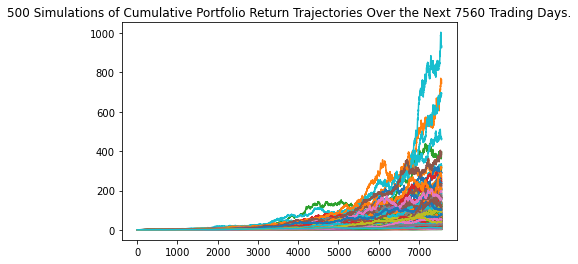

In [58]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
mc_30_sim = MCsim_30years_stocks.plot_simulation()
mc_30_sim


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

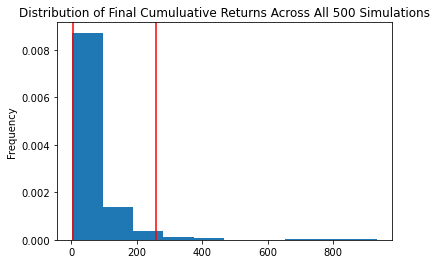

In [59]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc_30_dist = MCsim_30years_stocks.plot_distribution()
mc_30_dist


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [60]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MCsim_30year_summary = MCsim_30years_stocks.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
MCsim_30year_summary

C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean             65.339713
std              85.653131
min               2.630205
25%              20.491836
50%              37.903475
75%              75.411946
max             932.610441
95% CI Lower      6.392260
95% CI Upper    257.794569
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [61]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of your portfolio is: ${total_stocks_bonds}")


The current balance of the stock and bond portion of your portfolio is: $64513.3


In [98]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_30_cumulative_return = total_stocks_bonds*MCsim_30year_summary[8]
ci_upper_30_cumulative_return = total_stocks_bonds*MCsim_30year_summary[9]

print(f"CI lower 30 year cumulative return: ${ci_lower_30_cumulative_return: .2f}")
print(f"CI upper 30 year cumulative return: ${ci_upper_30_cumulative_return: .2f}")
print ()
# Print the result of your calculations
print("According to our analysis we are 95% confident that after 30 years")
print(f"your portfolio will have a value between ${ci_lower_30_cumulative_return:.2f} and ${ci_upper_30_cumulative_return:.2f}")


CI lower 30 year cumulative return: $ 412385.76
CI upper 30 year cumulative return: $ 16631178.37

According to our analysis we are 95% confident that after 30 years
your portfolio will have a value between $412385.76 and $16631178.37


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [68]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MCsim_10year = MCSimulation(
    portfolio_data=pricing_df_stocks,
    weights=[0.8, 0.2],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
MCsim_10year.portfolio_data.head()


SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2019-08-29 04:00:00+00:00  291.77  293.1600  290.610  292.58  58018751   
2019-08-30 04:00:00+00:00  294.21  294.2399  291.420  292.45  63024780   
2019-09-03 04:00:00+00:00  290.56  291.5800  289.270  290.74  69233875   
2019-09-04 04:00:00+00:00  293.15  294.0550  292.310  294.04  47160461   
2019-09-05 04:00:00+00:00  296.78  298.8300  294.001  297.82  83356779   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-29 04:00:00+00:00      309986  292.211021          NaN  291.77   
2019-08-30 04:00:00+00:00      303476  292.713824    -0.000444  294.21   
2019-09-03 04:00:00+00:00      362212  290.492676    -0.005847  290.56   
2019-09-04 04:00:00+00:00      236850  293.322384     0.011350  293.15   
2019-09-05 04:00:00+00:00      377089  297.528062     0.012855  296.78   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2019-08-29 04:00:00+00:00  293.1600  290.610  292.58  58018751      309986   
2019-08-30 04:00:00+00:00  294.2399  291.420  292.45  63024780      303476   
2019-09-03 04:00:00+00:00  291.5800  289.270  290.74  69233875      362212   
2019-09-04 04:00:00+00:00  294.0550  292.310  294.04  47160461      236850   
2019-09-05 04:00:00+00:00  298.8300  294.001  297.82  83356779      377089   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-29 04:00:00+00:00  292.211021          NaN  
2019-08-30 04:00:00+00:00  292.713824    -0.000444  
2019-09-03 04:00:00+00:00  290.492676    -0.005847  
2019-09-04 04:00:00+00:00  293.322384     0.011350  
2019-09-05 04:00:00+00:00  297.528062     0.012855

In [69]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MCsim_10year_cum = MCsim_10year.calc_cumulative_return()
MCsim_10year_cum

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 110.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 120.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 130.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 140.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 150.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 160.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 170.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 180.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 190.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 200.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 210.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 220.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 230.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 240.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 250.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 260.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 270.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 280.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 290.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 300.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 310.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 320.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 330.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 340.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 350.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 360.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 370.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 380.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 390.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 400.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 410.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 420.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 430.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 440.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 450.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 460.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 470.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 480.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 490.


C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992107,0.992523,1.007467,0.982649,1.025134,1.005001,0.993037,1.012701,0.997599,1.025477,...,1.000258,1.003701,0.977479,0.980231,1.020139,0.979272,0.982127,0.999035,1.025180,0.991486
2,1.016316,0.987073,1.001197,0.959814,1.026266,1.006740,1.007128,1.035844,1.006560,1.026784,...,1.002648,1.002206,0.993975,0.971232,1.020984,0.976162,0.980076,0.993861,1.017264,1.011342
3,1.010272,1.001815,0.994113,0.956358,1.029464,1.024866,1.001455,1.050648,0.999608,1.042373,...,0.989639,1.003690,1.012604,0.978923,1.019712,0.971579,0.956968,0.976476,1.006043,1.009358
4,1.016313,0.992846,0.969293,0.969707,1.044421,1.042420,0.997358,1.052641,1.000896,1.060503,...,1.012828,1.007787,0.993926,0.980443,0.999080,0.963856,0.950458,1.004584,1.004721,1.005806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,8.297123,2.319765,3.426685,3.271588,0.765788,4.416653,7.766195,1.685803,1.618532,2.278071,...,1.890036,0.858008,2.535343,1.486716,3.300812,3.359261,8.683535,3.085930,3.852260,3.787362
2517,8.232295,2.292182,3.409693,3.262388,0.767800,4.475749,7.764463,1.724871,1.603469,2.261349,...,1.907834,0.844082,2.551479,1.478412,3.298534,3.438037,8.788430,3.111201,3.831109,3.762703
2518,8.366285,2.278723,3.355915,3.261644,0.746114,4.531008,7.892812,1.725021,1.622151,2.247592,...,1.903718,0.841510,2.545265,1.504167,3.319094,3.453555,8.910476,3.152695,3.835891,3.742715
2519,8.447843,2.293114,3.300094,3.245898,0.740389,4.516923,7.962485,1.689628,1.642705,2.266873,...,1.901308,0.854500,2.530990,1.526409,3.357678,3.473018,8.991217,3.172687,3.806941,3.728797


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

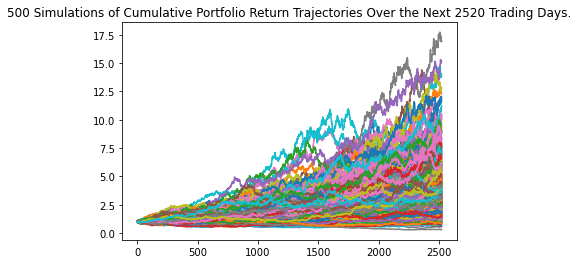

In [70]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MCsim_10year_plot = MCsim_10year.plot_simulation()
MCsim_10year_plot


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

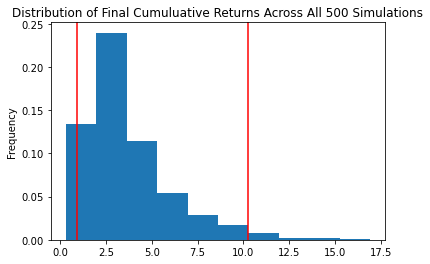

In [71]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MCsim_10year_dist = MCsim_10year.plot_distribution()
MCsim_10year_dist


In [110]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MCsim_10year_summary = MCsim_10year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
MCsim_10year_summary

C:\Users\reson\Desktop\Module5Challenge\financial_planning_tools\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              3.726760
std               2.421123
min               0.312896
25%               2.119439
50%               3.087633
75%               4.538467
max              16.910025
95% CI Lower      0.938858
95% CI Upper     10.222820
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [73]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current stock/bond portfolio value: ${total_portfolio:.2f}")


Current stock/bond portfolio value: $96735.01


In [94]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_10_cumulative_return = total_portfolio * MCsim_10year_summary[8]
ci_upper_10_cumulative_return = total_portfolio * MCsim_10year_summary[9]

print(f"CI lower 10 year cumulative return $ {ci_lower_10_cumulative_return: .2f}")
print(f"CI upper 10 year cumulative return $ {ci_upper_10_cumulative_return: .2f}")
print()
# Print the result of your calculations
print("A 10 year Monte Carlo Simulation of your stock/bond portfolio suggests that if you continue to invest 80% of your stock/funds in SPY and %20 in AGG.")
print(f"We can predict within a 95% confidence interval that the value of your porfolio will be valued between ${ci_lower_10_cumulative_return: .2f} and ${ci_upper_10_cumulative_return: .2f}")


CI lower 10 year cumulative return $  90820.43
CI upper 10 year cumulative return $  988904.62

A 10 year Monte Carlo Simulation of your stock/bond portfolio suggests that if you continue to invest 80% of your stock/funds in SPY and %20 in AGG.
We can predict within a 95% confidence interval that the value of your porfolio will be valued between $ 90820.43 and $ 988904.62


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [108]:
print(f"CI lower 10 year cumulative return: $ {ci_lower_10_cumulative_return: .2f}")
print(f"CI lower 30 year cumulative return: ${ci_lower_30_cumulative_return: .2f}")
ci_lower_10_30_difference = ci_lower_30_cumulative_return - ci_lower_10_cumulative_return
print ()
print("This is the difference of investing 30 years vs. 10 years and within a the lower confidence interval scenarios for both:")
print(f"${ci_lower_10_30_difference: .2f}")
      
print(f"CI upper 10 year cumulative return: $ {ci_upper_10_cumulative_return: .2f}")
print(f"CI upper 30 year cumulative return: ${ci_upper_30_cumulative_return: .2f}")
ci_upper_10_30_difference = ci_upper_30_cumulative_return - ci_upper_10_cumulative_return
print ()
print("This is the difference of investing 30 years vs. 10 years and within a the upper confidence interval scenarios for both:")
print(f"${ci_upper_10_30_difference: .2f}")

CI lower 10 year cumulative return: $  90820.43
CI lower 30 year cumulative return: $ 412385.76

This is the difference of investing 30 years vs. 10 years and within a the lower confidence interval scenarios for both:
$ 321565.33
CI upper 10 year cumulative return: $  988904.62
CI upper 30 year cumulative return: $ 16631178.37

This is the difference of investing 30 years vs. 10 years and within a the upper confidence interval scenarios for both:
$ 15642273.75
